## Final Project Submission

Please fill out:
* Student name: Simon Lau


# King County Housing Price data

In this notebook we will be analysing a set of data regarding the price and features of houses sold in King County.<br>
While doing this we are going to answer, among other things, a set of questions.

- How is the price of a house influenced by other features ?
- Which of these features would, in a real situation, be able to be changed to increase the house price ?
- Is there a season where the price of the houses goes up ?
- Does the location of the house have an impact on its price ?

## Prep.

In [49]:
reset -fs

In [50]:
#importing necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from scipy import stats
import folium
import os
import json
%matplotlib inline


In [51]:
#setting pandas display options to have more columns shown in .head() etc.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

## Data Mining 

In [52]:
#importing the data
dff = pd.read_csv("King_County_House_prices_dataset.csv")
dff.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [53]:
df = dff.copy() #making a copy to work with in case the import has to be run inbetween

In [128]:
#description of the variables in the data set
var_names = open("column_names.md", "r")
print(var_names.read())
var_names.close()

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - date house was sold
* **price** -  is prediction target / house price
* **bedroomsNumber** - Number of Bedrooms
* **bathroomsNumber** - Number of bathrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront / has a waterfront
* **view** - Has been viewed ?? - An index from 0 to 4 of how good the view of the property was 
* **condition** - How good the condition is ( Overall ) dependent on year built and grade
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coord

### Grade system explained

Condition: Relative to Age and Grade
- 1= Poor Many repairs needed. Showing serious deterioration.
- 2= Fair Some repairs needed immediately. Much deferred maintenance.
- 3= Average Depending upon age of improvement; normal amount of upkeep for the age
of the home.
- 4= Good Condition above the norm for the age of the home. Indicates extra attention
and care has been taken to maintain.
- 5= Very Good Excellent maintenance and updating on home. Not a total renovation.


Residential Building Grades

- Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
- Grade 4 Generally older low quality construction. Does not meet code.
- Grade 5 Lower construction costs and workmanship. Small, simple design.
- Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple
designs.
- Grade 7 Average grade of construction and design. Commonly seen in plats and older
subdivisions.
- Grade 8 Just above average in construction and design. Usually better materials in both
the exterior and interior finishes.
- Grade 9 Better architectural design, with extra exterior and interior design and quality.
- Grade 10 Homes of this quality generally have high quality features. Finish work is better,
and more design quality is seen in the floor plans and larger square footage.
- Grade 11 Custom design and higher quality finish work, with added amenities of solid
woods, bathroom fixtures and more luxurious options.
- Grade 12 Custom design and excellent builders. All materials are of the highest quality
and all conveniences are present.
- Grade 13 Generally custom designed and built. Approaching the Mansion level. Large
amount of highest quality cabinet work, wood trim and marble; large entries.


In [7]:
#https://www.kingcounty.gov/depts/assessor/~/media/depts/Assessor/documents/AreaReports/2018/Residential/015.ashx

In [ ]:
#https://www.kingcounty.gov/depts/assessor/PropertyTaxAssessments/ResidentialPTA.aspx    #value rating explained

Above link shows, that every 6 years king county gov. revalues houses. At these points they will probably also grade the houses. So it is very unlikely to not have a grade for a house.

## Data Cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We see that the date could be in a proper data type. Also sqft_basement seems to have the wrong type. Lets look at it more closely:

In [199]:
df.sqft_basement.unique() # we find ? in the data

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

In [26]:
df.date.unique() # only a period of two years of houses sold, not particularly significant

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

In [27]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

There seems to be a heavy outlier in bedrooms. Also sqft_lot15 seems to have a very high max. We also notice, that view, waterfront and yr_renovated have very few entries that are not 0.

In [28]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [29]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [30]:
df.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357

### Fixing outlier in bedrooms , we here assume, that 33 was a typo. We change it to 3.

In [124]:
(df["bedrooms"] == 33).sum()

1

In [125]:
df.bedrooms = df.bedrooms.replace({33: 3})


In [127]:
(df["bedrooms"] == 33).sum()

0

### Taking a closer look at waterfront


In [153]:
df[df['waterfront'] == 1].zipcode.unique()

array([98070, 98166, 98074, 98034, 98178, 98033, 98040, 98052, 98155,
       98008, 98006, 98075, 98144, 98004, 98199, 98056, 98146, 98023,
       98116, 98027, 98118, 98136, 98105, 98198, 98125, 98115, 98177,
       98039, 98028])

In [148]:
(df["waterfront"] == 1).sum()

146

Considering we are looking at king county here the number of non zero waterfront houses seems to be far to low.

### Identifying and replacing NaN by 0

In [55]:
nulls = df.isnull().sum().sort_values(ascending=False)

In [56]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [57]:
df = df.fillna(0)

### Replace ? with 0 then calculate the basement size

In [58]:
df = df.replace({'?': 0})

In [59]:
df["sqft_basement"] = df.sqft_basement.astype(float)

In [60]:
basement_list = []
for i in range(21597):
    basement_list.append(df.loc[i, "sqft_living"] - df.loc[i, "sqft_above"])

df["sqft_basement"] = basement_list

## Add columns to specify 

### Changing the type of date and inserting season of sale based on time

In [61]:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.5 M

In [62]:
season_list = []
for i in df.date:            #adding months based on the seasons below
    if 3 <= i.month < 5:
        season_list.append(0)
    elif 6 <= i.month < 8:
        season_list.append(1)
    elif 9 <= i.month < 11:
        season_list.append(2)
    else:
        season_list.append(3)

df["season_sold"] = season_list

- Spring runs from March 1 to May 31;   0
- Summer runs from June 1 to August 31;  1
- Fall (autumn) runs from September 1 to November 30; and  2
- Winter runs from December 1 to February 28  3

#### column for has basement

In [63]:
basement_list = []
for i in df.sqft_basement:
    if i != 0:
        basement_list.append(1)
    else:
        basement_list.append(0)
        
df["has_basement"] = basement_list

#### column for was renovated

In [64]:
renovated_list = []
for i in df.yr_renovated:
    if i != 0:
        renovated_list.append(1)
    else:
        renovated_list.append(0)
        
df["was_renovated"] = renovated_list

### Combining year build and year renovated. Assume, that year of renovation has a high impact, hence the higher factor.

In [66]:
yearcomb_list = []
for i in range(21597):
    if df.loc[i, "was_renovated"] == 1:
        yearcomb_list.append(((0.2 *df.loc[i, "yr_built"]) + (0.8 * df.loc[i, "yr_renovated"])))
    else:
        yearcomb_list.append(df.loc[i, "yr_built"])
df["combined_year_build"] = yearcomb_list

In [67]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955           0.0    98178  47.5112 -122.257   
1            400      1951        1991.0    98125  47.7210 -122.319   
2              0      1933           0.0    98028  47.7379 -122.233   
3            910      1965           0.0    98136  47.5208 -122.393   
4              0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  season_sold  has_basement  was_renovated  \
0           1340        5650            2             0              0   
1           1690        7639            3             1              1   
2           2720        8062            3             0              0   
3           1360        5000            3             1              0   
4           1800        7503            3             0              0   

   combined_year_build  
0               1955.0  
1               1983.0  
2               1933.0  
3               1965.0  
4               1987.0

## Data Exploration and the rest after it ( the boundaries get muddy )

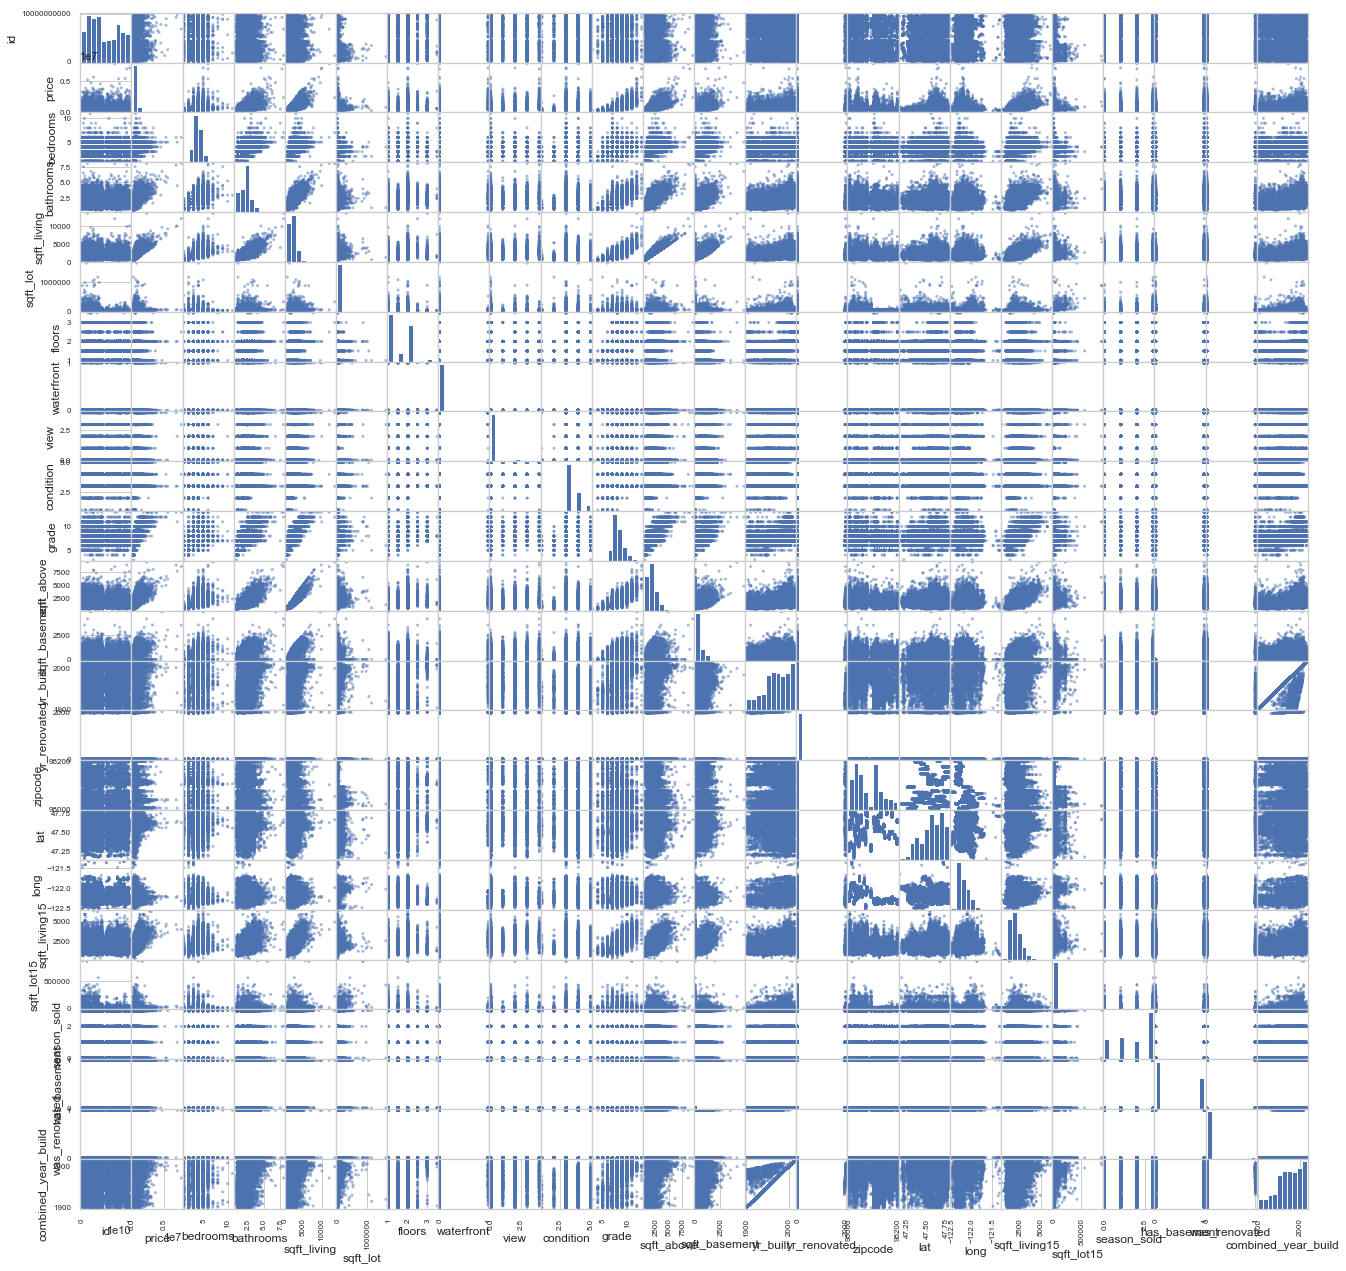

In [200]:
pd.plotting.scatter_matrix(df, figsize = (22, 22), edgecolor = 'none', alpha = 0.5);

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


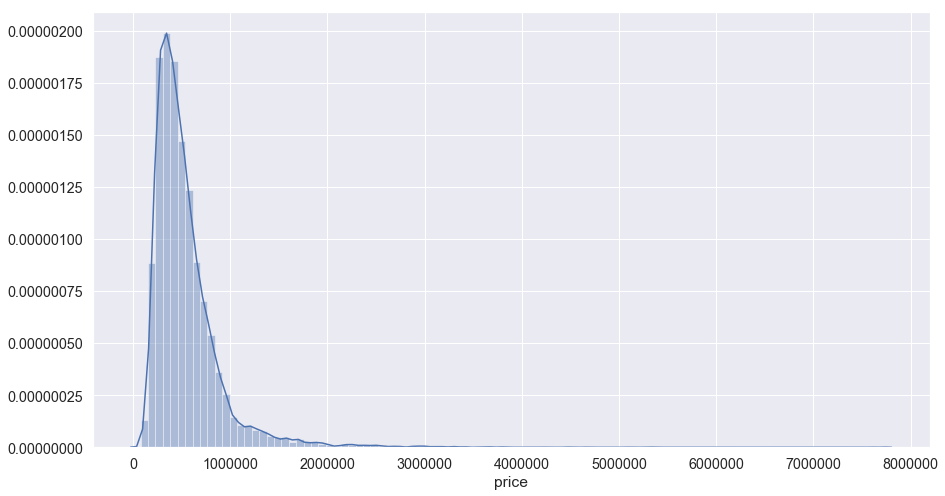

In [310]:
fig = plt.figure(figsize=(15, 8))
sns.distplot(df.price, bins=100); #histogram for price

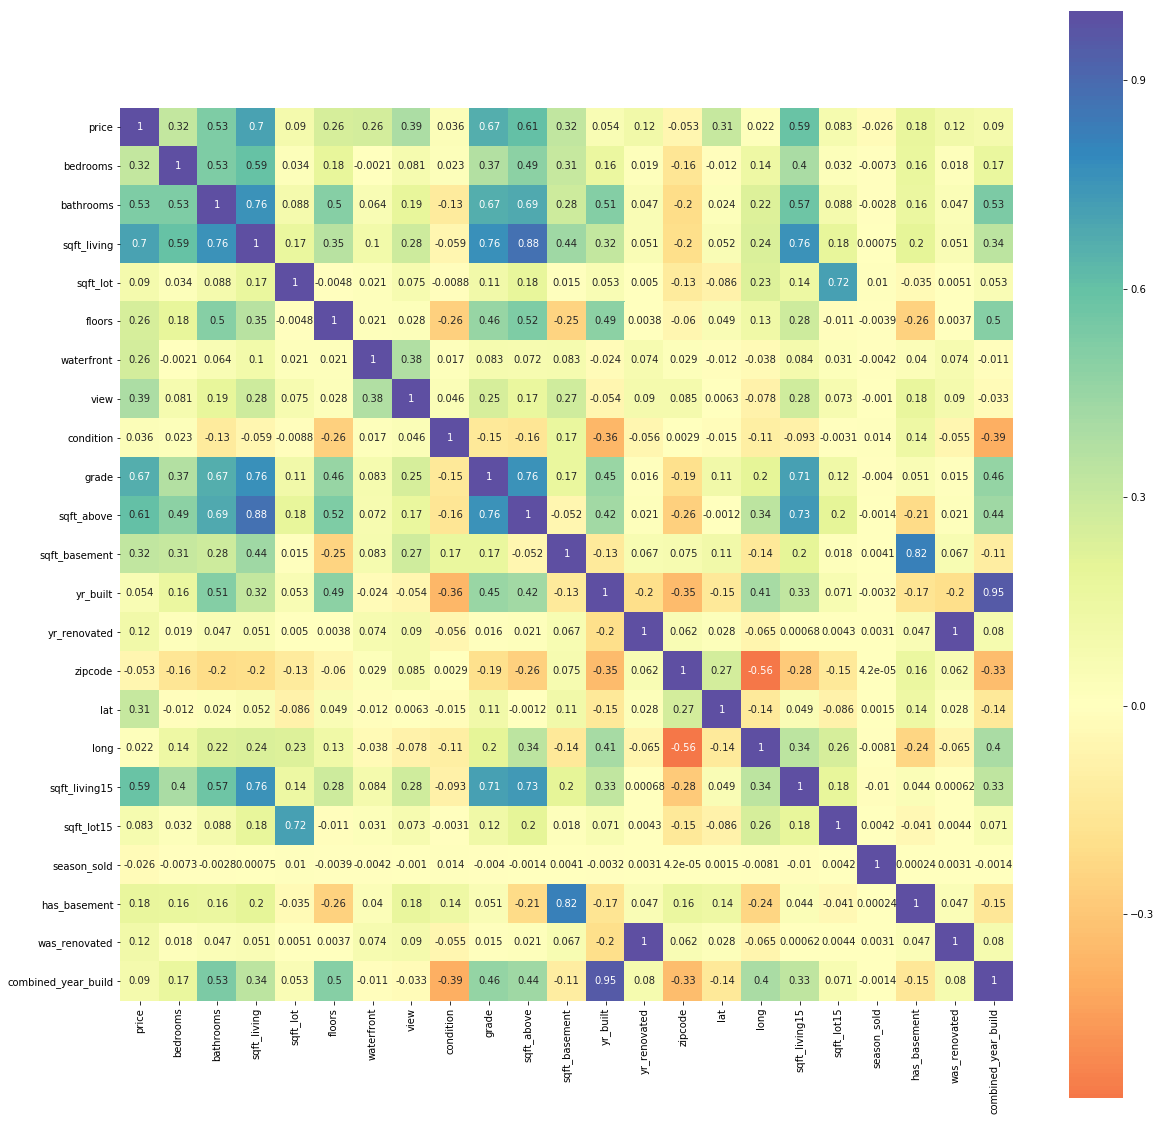

In [141]:
corr = df.drop(columns = "id").corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data = corr, center = 0, cmap = "Spectral", annot = True, square = True);

- from the heatmap above we see, that the price is mostly dependent on sqft_living15, sqft_above, grade, sqft_living and bathrooms. However note that if we think about it for a moment, zipcode should play a big role too. However it doesnt show well in the heatmap ( probably cause it is a categorical variable )
- regarding these we note some other things: sqft_living and sqft_living 15 are highly correlating, so we probably only need one of them
- as we have seen at the start of the notebook in the definition of grade , we will surely need that ( it includes many of the other values, hence we see many variables correlating heavily with it)
- sqft_above also heavily , as u would expect, correlates with sqft_living , so we throw it too
- bathrooms is also such a candidate ( we will try to use it later on, but spoiler alert: it is rather unimportant )
- by goin with the heatmap , we are left with sqft_living and grade. As I said we will also use zipcodes as a categorical later as it should do much.

## New Dataframe, we drop useless columns

To display the data we are left after analysing the heatmap:

In [143]:
drop_list = ["id",'date', "lat", "long", 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'was_renovated',
             'combined_year_build', "season_sold", "has_basement", "sqft_lot15", "sqft_living15", "condition",
            "floors", "bedrooms", "sqft_lot"]
df_drop = df.drop(columns = drop_list)
df_drop.head()

price  bathrooms  sqft_living  waterfront  view  grade  zipcode
0  221900.0       1.00         1180         0.0   0.0      7    98178
1  538000.0       2.25         2570         0.0   0.0      7    98125
2  180000.0       1.00          770         0.0   0.0      6    98028
3  604000.0       3.00         1960         0.0   0.0      7    98136
4  510000.0       2.00         1680         0.0   0.0      8    98074

We are left with waterfront and view. They didnt have such high values in the heatmap, though waterfront, out of experience, should make an impact. However there are only very few non-zero waterfront values, which doesnt seem very correct. Regarding view its not even very comprehensive what it exactly means. At this point I should note, and I will show it later too, that view and waterfront have a heavy impact on the regression. This is not surprising as for example a house with waterfront in this dataset is way more pricy than the ones without.

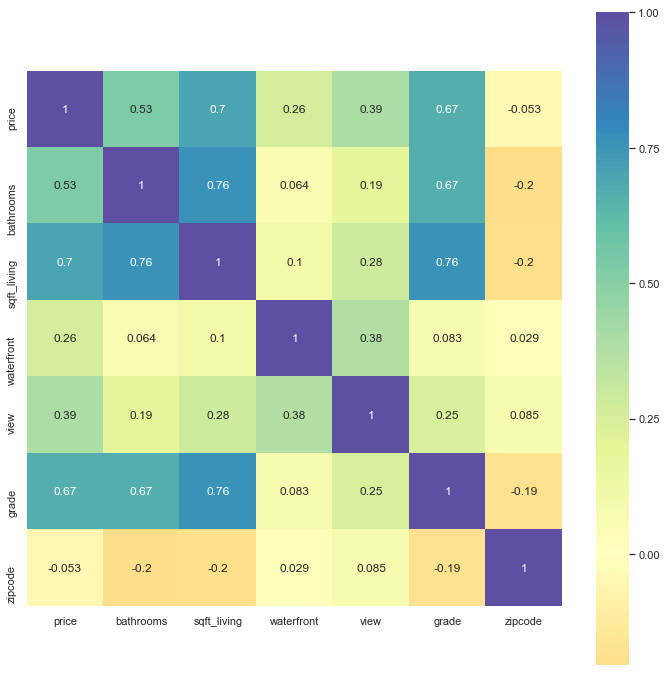

In [201]:
corr = df_drop.corr()
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data = corr, center = 0, cmap="Spectral", annot = True, square = True);

Quick look, whether there is a particular season where the price is higher: No

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


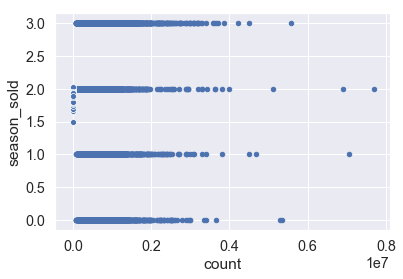

In [303]:

df.plot.scatter(x = "price", y = "season_sold")


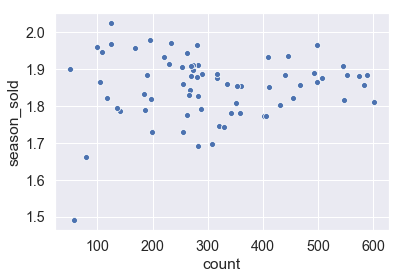

In [304]:
sns.scatterplot(x = "count", y = "season_sold", data = zipcode_data)

## Looking at grade

As the variables we found out to be important for the price, can not be changed by a seller without serious investment, let's look at the one variable that is a bit omnious in what it says exactly: grade. <br>
If we can find out how to infuence grade, we thereby can also infuence the price in our favour.

In [363]:
df_grade = df.copy()

In [364]:
df_grade = df_grade.drop(columns = ["id", "price", "lat", "long", "waterfront", "view"])

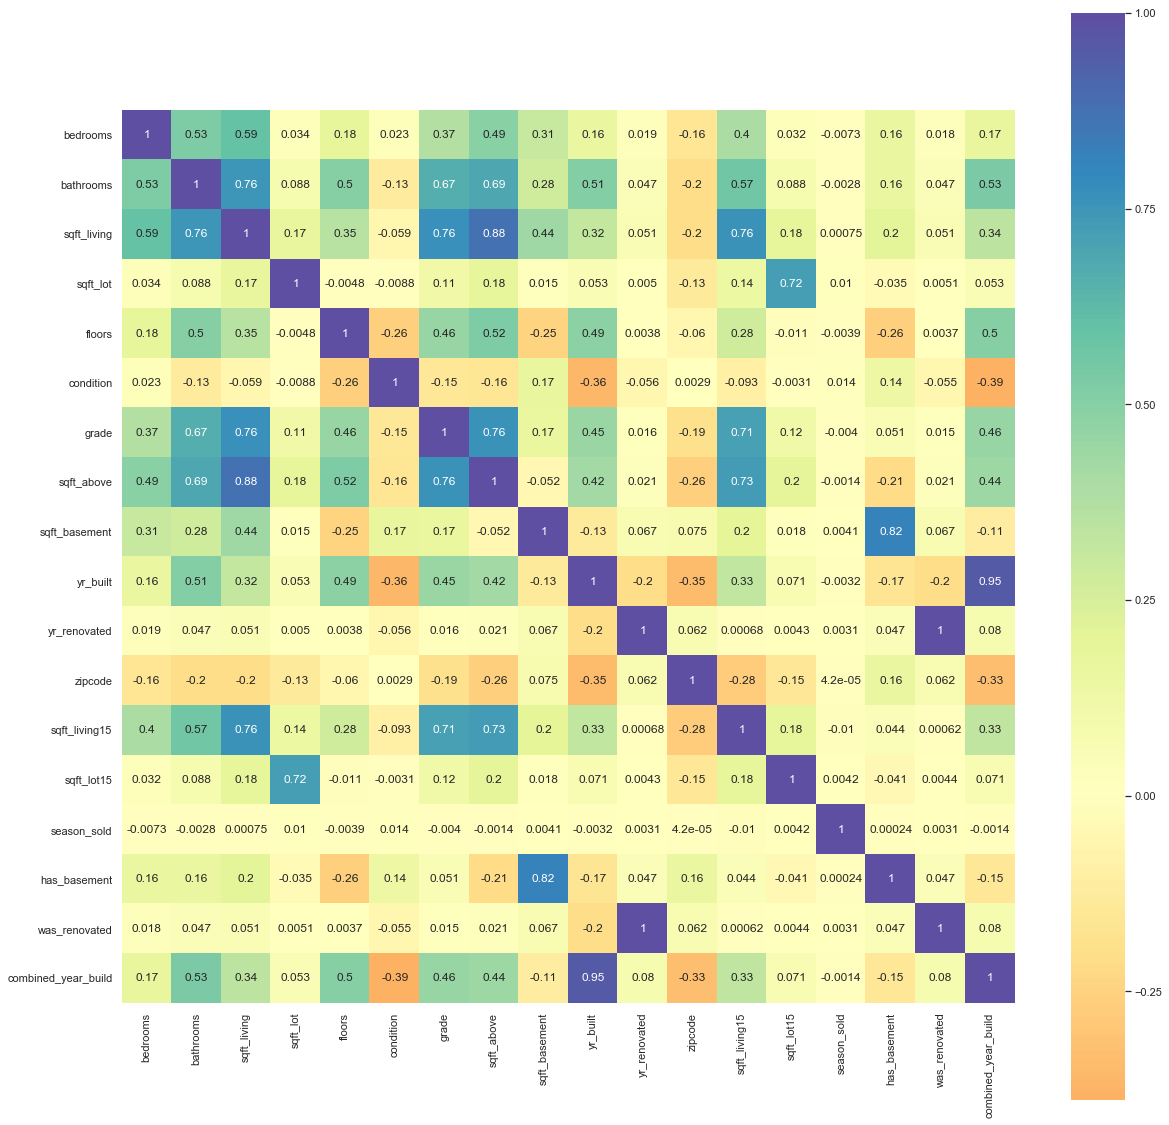

In [365]:
corr_grade = df_grade.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data = corr_grade, center = 0, cmap="Spectral", annot = True, square = True);

We see, that grade correlates with the year build, floors, bathrooms, bedrooms and general sqft.<br>
Let's take a look at a linear regression, where we try to predict the grade of a house based on the variables we found to be relevant.


In [367]:
# Grade in relation to all relevant features
form_grade = "grade ~ bedrooms + bathrooms + sqft_living15 + combined_year_build + floors + sqft_living + C(zipcode)"

modell = smf.ols(data = df_grade, formula = form_grade)
results_grade = modell.fit()
results_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     761.4
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:21:22   Log-Likelihood:                -20103.
No. Observations:               21597   AIC:                         4.036e+04
Df Residuals:                   21521   BIC:                         4.097e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -12.7924      0.429    -29.841      0.000     -13.633     -11.952
C(zipcode)[T.98002]    -0.1404      0.054     -2.581      0.010      -0.247      -0.034
C(zipcode)[T.98003]     0.2641      0.049      5.392      0.000       0.168       0.360
C(zipcode)[T.98004]     0.4844      0.048     10.126      0.000       0.391       0.578
C(zipcode)[T.98005]     0.5597      0.058      9.683      0.000       0.446       0.673
C(zipcode)[T.98006]     0.4988      0.043     11.562      0.000       0.414       0.583
C(zipcode)[T.98007]     0.5002      0.061      8.177      0.000       0.380       0.620
C(zipcode)[T.98008]     0.3455      0.049      7.056      0.000       0.250       0.441
C(zipcode)[T.98010]    -0.1570      0.070     -2.259      0.024      -0.293      -0.021
C(zipcode)[T.98011]     0.0524      0.055      0.958      0.338      -0.055       0.160
C(zipcode)[T.98014]    -0.1510      0.064     -2.356      0.019      -0.277      -0.025
C(zipcode)[T.98019]    -0.2495      0.055     -4.521      0.000      -0.358      -0.141
C(zipcode)[T.98022]    -0.0078      0.052     -0.152      0.880      -0.109       0.094
C(zipcode)[T.98023]     0.2063      0.043      4.853      0.000       0.123       0.290
C(zipcode)[T.98024]    -0.0491      0.076     -0.645      0.519      -0.198       0.100
C(zipcode)[T.98027]     0.1655      0.045      3.716      0.000       0.078       0.253
C(zipcode)[T.98028]     0.0956      0.049      1.956      0.050      -0.000       0.191
C(zipcode)[T.98029]     0.4181      0.047      8.810      0.000       0.325       0.511
C(zipcode)[T.98030]    -0.0012      0.050     -0.024      0.981      -0.100       0.097
C(zipcode)[T.98031]     0.0252      0.049      0.510      0.610      -0.072       0.122
C(zipcode)[T.98032]     0.2180      0.064      3.413      0.001       0.093       0.343
C(zipcode)[T.98033]     0.3219      0.044      7.322      0.000       0.236       0.408
C(zipcode)[T.98034]     0.1955      0.042      4.680      0.000       0.114       0.277
C(zipcode)[T.98038]    -0.1898      0.041     -4.602      0.000      -0.271      -0.109
C(zipcode)[T.98039]     0.5404      0.094      5.780      0.000       0.357       0.724
C(zipcode)[T.98040]     0.5365      0.050     10.812      0.000       0.439       0.634
C(zipcode)[T.98042]    -0.0472      0.042     -1.132      0.258      -0.129       0.035
C(zipcode)[T.98045]     0.1130      0.053      2.148      0.032       0.010       0.216
C(zipcode)[T.98052]     0.3257      0.041      7.853      0.000       0.244       0.407
C(zipcode)[T.98053]     0.0148      0.045      0.329      0.742      -0.073       0.103
C(zipcode)[T.98055]     0.0209      0.050      0.421      0.673      -0.076       0.118
C(zipcode)[T.98056]    -0.0066      0.044     -0.147      0.883      -0.094       0.081
C(z

In [368]:
# Grade in relation to all relevant features without zipcode and sqft_living
form_grade = "grade ~ bedrooms + bathrooms + sqft_living15 + combined_year_build + floors"

modell = smf.ols(data = df_grade, formula = form_grade)
results_grade = modell.fit()
results_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7532.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:22:39   Log-Likelihood:                -23193.
No. Observations:               21597   AIC:                         4.640e+04
Df Residuals:                   21591   BIC:                         4.645e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.8951      0.409     -4.637      0.000      -2.696      -1.094
bedrooms               -0.0290      0.006     -4.497      0.000      -0.042      -0.016
bathrooms               0.4263      0.010     43.426      0.000       0.407       0.446
sqft_living15           0.0009   8.67e-06     98.100      0.000       0.001       0.001
combined_year_build     0.0033      0.000     15.771      0.000       0.003       0.004
floors                  0.3088      0.011     28.224      0.000       0.287       0.330
==============================================================================
Omnibus:                      566.973   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1212.237
Skew:                           0.146   Prob(JB):                    5.83e-264
Kurtosis:                       4.123   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is a OK result, however this was to be expected. There are surely more than these variables that are used when king county gov. gives out those grades. However we do see, that bathrooms seem to make a big impact, same as floors. So as we might have guessed, giving a house a extra bathroom surely will also help the price.

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Predicted Y')

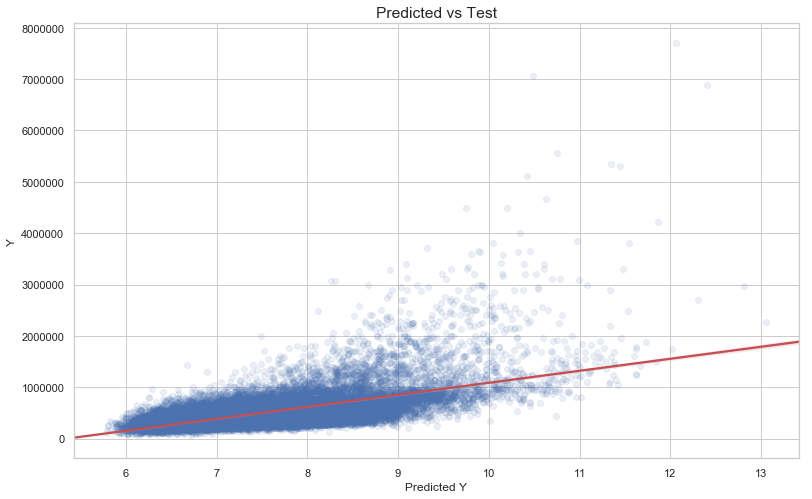

In [369]:
Y_grade = df_grade.grade
X_grade = df_grade[["bedrooms", "bathrooms", "sqft_living15", "combined_year_build", "floors"]]

test_pred = results_grade.predict(X_grade)
residuals_test = Y_grade - test_pred

plt.figure(figsize = (13,8))

sns.set(style = "whitegrid")

sns.regplot(test_pred, Y, scatter_kws = {'color':'b','alpha':0.1},color='r')
sns.set(font_scale = 1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y')
plt.xlabel('Predicted Y')

### House location based on longitude / latitude

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

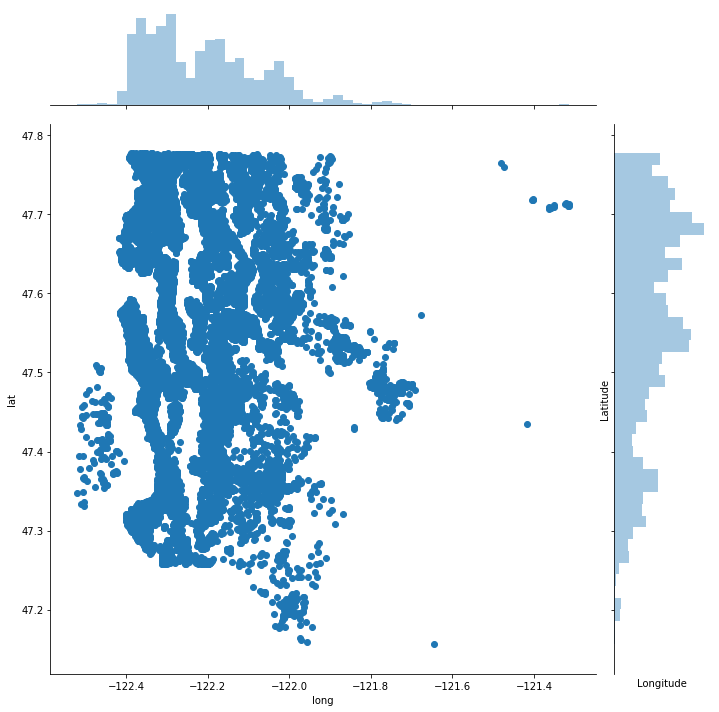

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [264]:
plt.figure(figsize = (10,10))
sns.jointplot(y = df2.lat, x = df2.long, height = 10);
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
sns.despine

### Same plot as above with the price of the house as the hue of the points

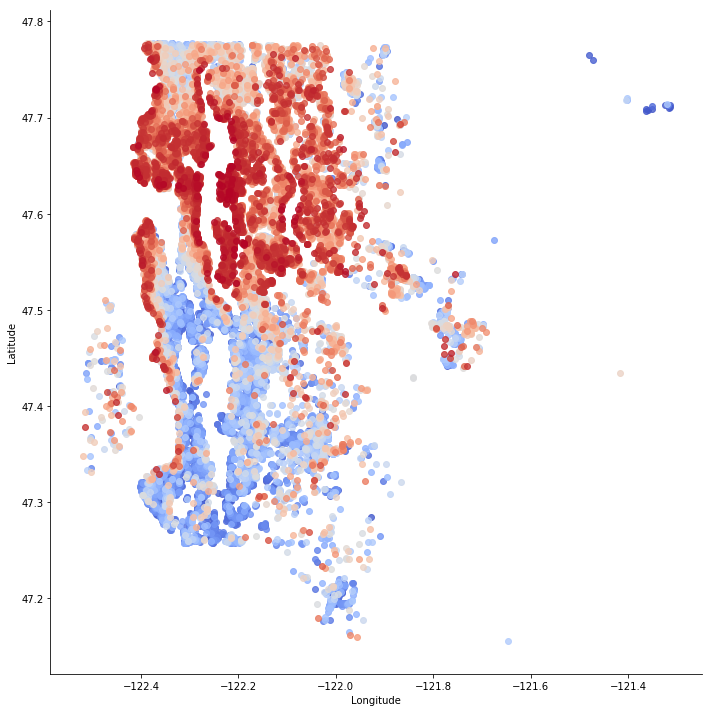

In [162]:
# Color description : light blue - lowest price to dark red -highest price
sns.lmplot(y = "lat", x = "long", hue = "price", data = df, fit_reg = False, height = 10, legend = False, palette = "coolwarm")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### Plotting the grade as a hue

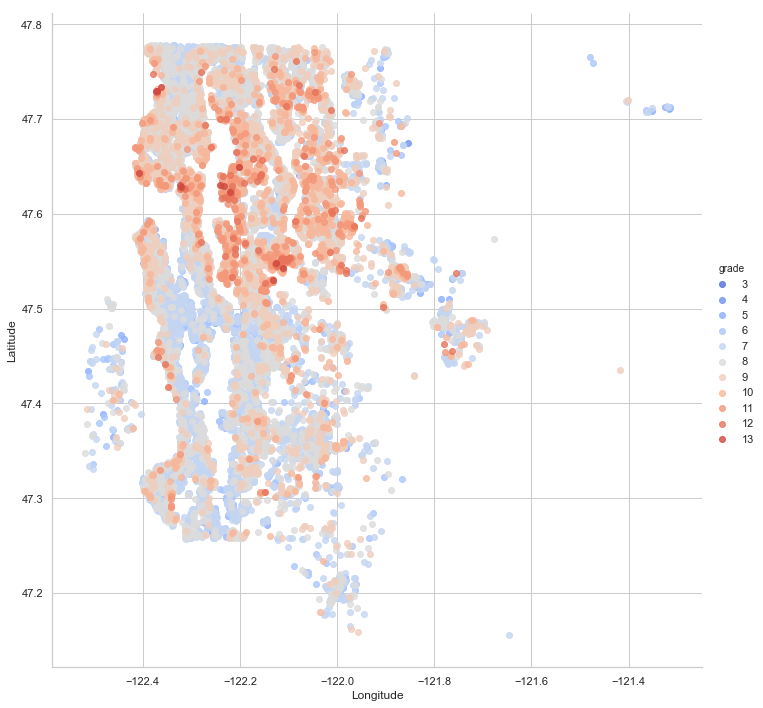

In [202]:
sns.lmplot(y = "lat", x = "long", hue = "grade", data = df, fit_reg = False, height = 10, legend = True, palette = "coolwarm")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Geoplots

In [70]:
#defining a function to generate a map in a quicker way
def generateBaseMap(default_location = [47.6080, -122.3351], default_zoom_start = 12):
    base_map = folium.Map(location = default_location, control_scale = True, zoom_start = default_zoom_start)
    return base_map

In [311]:
#generating a heatmap
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data = df[["lat", 'long', 'price']].groupby(['lat', 'long']).sum().reset_index().values.tolist(), radius = 8, max_zoom = 13).add_to(base_map)
base_map

The heatmap on the geoplot sadly does not show us much.

In [380]:
df_geo = df.copy()
df_geo = df_geo.astype({"zipcode": str})
# producing a new dataframe where zipcode datatype is str so we can use it for mapping it onto a json data

the following bits of code where taken from https://www.kaggle.com/osterburg/king-county/notebook, thanks for it.

In [381]:
# get the mean value across all data points
zipcode_data = df_geo.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace = True)

In [382]:
# Get geo data file path
geo_data_file = "SeattleMSA2.geojson"
# load GeoJSON
with open(geo_data_file, 'r') as jsonFile:
    geo_data = json.load(jsonFile)
    
tmp = geo_data
# remove ZIP codes not in geo data
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['ZIP'] in list(zipcode_data['zipcode'].unique()):
        geozips.append(tmp['features'][i])
# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips
# save uodated JSON object
open("cleaned_geodata.json", "w").write(json.dumps(new_json, sort_keys = True, indent = 4, separators = (',', ': ')))

1050044

In [383]:
def map_feature_by_zipcode(zipcode_data, col):
    """
    Generates a folium map of Seattle
    :param zipcode_data: zipcode dataset
    :param col: feature to display
    :return: m
    """

    # read updated geo data
    king_geo = "cleaned_geodata.json"

    # Initialize Folium Map with Seattle latitude and longitude
    m = folium.Map(location=[47.35, -121.9], zoom_start=9,
                   detect_retina=True, control_scale=False)

    # Create choropleth map
    m.choropleth(
        geo_data=king_geo,
        name='choropleth',
        data=zipcode_data,
        # col: feature of interest
        columns=['zipcode', col],
        key_on='feature.properties.ZIP',
        fill_color='OrRd',
        fill_opacity=0.9,
        line_opacity=0.2,
        legend_name='house ' + col
    )

    folium.LayerControl().add_to(m)

    # Save map based on feature of interest
    m.save(col + '.html')

    return m

In [384]:
#map plotting the average price per zipcode
map_feature_by_zipcode(zipcode_data, 'price')

//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [297]:
#plotting the price itself per zipcode
geo = "cleaned_geodata.json"
base_map2 = generateBaseMap()
folium.Choropleth(
    geo_data = geo,
    name = "choropleth",
    data = df_geo,
    columns = ["zipcode", "price"],
    key_on = "feature.properties.ZIP",
    fill_color = "BuPu",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Prize"
).add_to(base_map2)

folium.LayerControl().add_to(base_map2)

base_map2

In [294]:
#Geoplot for grade
map_feature_by_zipcode(zipcode_data, 'grade')

//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Finding out where the most houses were sold:

In [282]:
df_count = df.copy()
df_count['zipcode'] = df_count['zipcode'].astype('str')
# count number of houses grouped by zipcode
df_count['count'] = 1
t = df_count.groupby('zipcode').sum()
t.reset_index(inplace = True)
t = t[['zipcode', 'count']]
zipcode_data = pd.merge(zipcode_data, t, on='zipcode')
# drop count from org dataset
df_count.drop(['count'], axis = 1, inplace = True)

In [295]:
map_feature_by_zipcode(zipcode_data, 'count')

//anaconda3/envs/nf/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Linear Regression

Below there are three different approaches for doing the linear regression with different sets of data.

In [209]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0  3         1.00       1180          
1  6414100192 2014-12-09  538000.0  3         2.25       2570          
2  5631500400 2015-02-25  180000.0  2         1.00       770           
3  2487200875 2014-12-09  604000.0  4         3.00       1960          
4  1954400510 2015-02-18  510000.0  3         2.00       1680          

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0  5650      1.0     0.0         0.0   3          7      1180         
1  7242      2.0     0.0         0.0   3          7      2170         
2  10000     1.0     0.0         0.0   3          6      770          
3  5000      1.0     0.0         0.0   5          7      1050         
4  8080      1.0     0.0         0.0   3          8      1680         

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0  0.0            1955      0.0           98178    47.5112 -122.257   
1  400.0          1951      1991.0        98125    47.7210 -122.319   
2  0.0            1933      0.0           98028    47.7379 -122.233   
3  910.0          1965      0.0           98136    47.5208 -122.393   
4  0.0            1987      0.0           98074    47.6168 -122.045   

   sqft_living15  sqft_lot15  year  season_sold  has_basement  was_renovated  \
0  1340           5650        2014  2            0             0               
1  1690           7639        2014  3            1             1               
2  2720           8062        2015  3            0             0               
3  1360           5000        2014  3            1             0               
4  1800           7503        2015  3            0             0               

   combined_year_build  
0  1955.0               
1  1979.0               
2  1933.0               
3  1965.0               
4  1987.0

In [313]:
#lin. reg. where almost all variables are used.
#Gives the best result, but the number of variables needed just seems daunting.

form = "price ~ sqft_living + sqft_lot + bedrooms + view + waterfront + bathrooms \
        + sqft_living15 + sqft_lot15 + season_sold + has_basement + C(grade)+C(zipcode) + combined_year_build"

modell = smf.ols(data = df, formula = form)
results = modell.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:00:16   Log-Likelihood:            -2.8826e+05
No. Observations:               21597   AIC:                         5.767e+05
Df Residuals:                   21506   BIC:                         5.774e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.476e+06   1.85e+05      7.991      0.000    1.11e+06    1.84e+06
C(grade)[T.4]       -1.665e+05   1.55e+05     -1.075      0.283    -4.7e+05    1.37e+05
C(grade)[T.5]       -1.921e+05   1.52e+05     -1.260      0.208   -4.91e+05    1.07e+05
C(grade)[T.6]       -1.847e+05   1.52e+05     -1.213      0.225   -4.83e+05    1.14e+05
C(grade)[T.7]       -1.796e+05   1.52e+05     -1.180      0.238   -4.78e+05    1.19e+05
C(grade)[T.8]       -1.611e+05   1.52e+05     -1.058      0.290    -4.6e+05    1.37e+05
C(grade)[T.9]        -8.81e+04   1.52e+05     -0.578      0.563   -3.87e+05     2.1e+05
C(grade)[T.10]        3.26e+04   1.52e+05      0.214      0.831   -2.66e+05    3.31e+05
C(grade)[T.11]       2.277e+05   1.53e+05      1.492      0.136   -7.14e+04    5.27e+05
C(grade)[T.12]       6.395e+05   1.53e+05      4.168      0.000    3.39e+05     9.4e+05
C(grade)[T.13]       1.748e+06   1.59e+05     11.018      0.000    1.44e+06    2.06e+06
C(zipcode)[T.98002]  1.389e+04   1.34e+04      1.033      0.302   -1.25e+04    4.02e+04
C(zipcode)[T.98003] -4509.6622   1.21e+04     -0.372      0.710   -2.82e+04    1.92e+04
C(zipcode)[T.98004]  7.751e+05   1.19e+04     65.366      0.000    7.52e+05    7.98e+05
C(zipcode)[T.98005]  3.195e+05   1.43e+04     22.293      0.000    2.91e+05    3.48e+05
C(zipcode)[T.98006]  2.566e+05   1.07e+04     23.955      0.000    2.36e+05    2.78e+05
C(zipcode)[T.98007]   2.58e+05   1.51e+04     17.045      0.000    2.28e+05    2.88e+05
C(zipcode)[T.98008]  2.704e+05   1.21e+04     22.314      0.000    2.47e+05    2.94e+05
C(zipcode)[T.98010]  7.374e+04   1.72e+04      4.276      0.000    3.99e+04    1.08e+05
C(zipcode)[T.98011]  1.349e+05   1.35e+04      9.971      0.000    1.08e+05    1.61e+05
C(zipcode)[T.98014]  8.998e+04   1.61e+04      5.588      0.000    5.84e+04    1.22e+05
C(zipcode)[T.98019]  9.065e+04   1.37e+04      6.626      0.000    6.38e+04    1.17e+05
C(zipcode)[T.98022]  2482.2983   1.29e+04      0.192      0.848   -2.29e+04    2.79e+04
C(zipcode)[T.98023] -2.379e+04   1.05e+04     -2.262      0.024   -4.44e+04   -3173.911
C(zipcode)[T.98024]  1.558e+05    1.9e+04      8.194      0.000    1.18e+05    1.93e+05
C(zipcode)[T.98027]  1.679e+05   1.11e+04     15.196      0.000    1.46e+05     1.9e+05
C(zipcode)[T.98028]  1.299e+05   1.21e+04     10.757      0.000    1.06e+05    1.54e+05
C(zipcode)[T.98029]  2.149e+05   1.18e+04     18.285      0.000    1.92e+05    2.38e+05
C(zipcode)[T.98030]  5690.8608   1.24e+04      0.459      0.647   -1.86e+04       3e+04
C(zipcode)[T.98031]  2.019e+04   1.22e+04      1.657      0.098   -3698.567    4.41e+04
C(zipcode)[T.98032]  9943.2572   1.58e+04      0.630      0.529    -2.1e+04    4.09e+04
C(zipcode)[T.98033]  3.671e+05   1.09e+04     33.734      0.000    3.46e+05    3.88e+05
C(z

In [208]:
#lin. reg. cut down on the important features.
#There are view and waterfront present to show their impact.
#But as they seem unsafe bets for accuracy we get the model below.

form2 = "price ~ sqft_living + C(grade) + C(zipcode) + view + waterfront"

modell = smf.ols(data = df, formula = form2)
results = modell.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1246.
Date:                Sat, 02 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:26:37   Log-Likelihood:            -2.8850e+05
No. Observations:               21597   AIC:                         5.772e+05
Df Residuals:                   21514   BIC:                         5.778e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.637e+05   1.54e+05      1.063      0.288   -1.38e+05    4.66e+05
C(grade)[T.4]       -1.606e+05   1.57e+05     -1.025      0.305   -4.68e+05    1.46e+05
C(grade)[T.5]       -1.953e+05   1.54e+05     -1.267      0.205   -4.97e+05    1.07e+05
C(grade)[T.6]       -1.991e+05   1.54e+05     -1.294      0.196   -5.01e+05    1.02e+05
C(grade)[T.7]        -2.05e+05   1.54e+05     -1.332      0.183   -5.07e+05    9.66e+04
C(grade)[T.8]       -1.854e+05   1.54e+05     -1.205      0.228   -4.87e+05    1.16e+05
C(grade)[T.9]        -1.06e+05   1.54e+05     -0.689      0.491   -4.08e+05    1.96e+05
C(grade)[T.10]       2.412e+04   1.54e+05      0.157      0.876   -2.78e+05    3.26e+05
C(grade)[T.11]        2.31e+05   1.54e+05      1.498      0.134   -7.13e+04    5.33e+05
C(grade)[T.12]       6.547e+05   1.55e+05      4.224      0.000    3.51e+05    9.58e+05
C(grade)[T.13]       1.773e+06    1.6e+05     11.065      0.000    1.46e+06    2.09e+06
C(zipcode)[T.98002]  1.458e+04   1.36e+04      1.074      0.283    -1.2e+04    4.12e+04
C(zipcode)[T.98003] -3955.5417   1.22e+04     -0.323      0.746   -2.79e+04       2e+04
C(zipcode)[T.98004]   7.83e+05   1.19e+04     65.696      0.000     7.6e+05    8.06e+05
C(zipcode)[T.98005]  3.292e+05   1.44e+04     22.857      0.000    3.01e+05    3.57e+05
C(zipcode)[T.98006]  2.614e+05   1.07e+04     24.334      0.000     2.4e+05    2.82e+05
C(zipcode)[T.98007]  2.634e+05   1.53e+04     17.257      0.000    2.34e+05    2.93e+05
C(zipcode)[T.98008]  2.715e+05   1.22e+04     22.238      0.000    2.48e+05    2.95e+05
C(zipcode)[T.98010]  7.854e+04   1.74e+04      4.523      0.000    4.45e+04    1.13e+05
C(zipcode)[T.98011]  1.385e+05   1.37e+04     10.144      0.000    1.12e+05    1.65e+05
C(zipcode)[T.98014]  1.053e+05    1.6e+04      6.578      0.000    7.39e+04    1.37e+05
C(zipcode)[T.98019]  9.756e+04   1.38e+04      7.086      0.000    7.06e+04    1.25e+05
C(zipcode)[T.98022]  1.619e+04    1.3e+04      1.250      0.211   -9197.943    4.16e+04
C(zipcode)[T.98023] -2.619e+04   1.06e+04     -2.467      0.014    -4.7e+04   -5378.792
C(zipcode)[T.98024]  1.796e+05    1.9e+04      9.458      0.000    1.42e+05    2.17e+05
C(zipcode)[T.98027]  1.723e+05   1.11e+04     15.495      0.000    1.51e+05    1.94e+05
C(zipcode)[T.98028]  1.332e+05   1.22e+04     10.925      0.000    1.09e+05    1.57e+05
C(zipcode)[T.98029]  2.218e+05   1.19e+04     18.687      0.000    1.99e+05    2.45e+05
C(zipcode)[T.98030]  7510.9462   1.25e+04      0.599      0.549   -1.71e+04    3.21e+04
C(zipcode)[T.98031]  2.181e+04   1.23e+04      1.771      0.077   -2330.322     4.6e+04
C(zipcode)[T.98032]  5184.9663   1.59e+04      0.325      0.745    -2.6e+04    3.64e+04
C(zipcode)[T.98033]  3.705e+05    1.1e+04     33.740      0.000    3.49e+05    3.92e+05
C(z

In [317]:
#The result of the lin. reg. is slightly worse.
#However we only use the necessary features.

form3 = "price ~ sqft_living + C(grade) + C(zipcode)"

modell = smf.ols(data = df, formula = form3)
results = modell.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     968.8
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:53:48   Log-Likelihood:            -2.9091e+05
No. Observations:               21597   AIC:                         5.820e+05
Df Residuals:                   21516   BIC:                         5.826e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.243e+05   1.72e+05      0.722      0.470   -2.13e+05    4.62e+05
C(grade)[T.4]       -1.288e+05   1.75e+05     -0.736      0.462   -4.72e+05    2.14e+05
C(grade)[T.5]       -1.643e+05   1.72e+05     -0.954      0.340   -5.02e+05    1.73e+05
C(grade)[T.6]       -1.851e+05   1.72e+05     -1.076      0.282   -5.22e+05    1.52e+05
C(grade)[T.7]       -1.929e+05   1.72e+05     -1.122      0.262    -5.3e+05    1.44e+05
C(grade)[T.8]       -1.674e+05   1.72e+05     -0.974      0.330   -5.05e+05     1.7e+05
C(grade)[T.9]        -8.29e+04   1.72e+05     -0.482      0.630    -4.2e+05    2.54e+05
C(grade)[T.10]       6.202e+04   1.72e+05      0.360      0.719   -2.75e+05    3.99e+05
C(grade)[T.11]       2.936e+05   1.72e+05      1.704      0.088   -4.42e+04    6.31e+05
C(grade)[T.12]       7.742e+05   1.73e+05      4.470      0.000    4.35e+05    1.11e+06
C(grade)[T.13]       1.797e+06   1.79e+05     10.034      0.000    1.45e+06    2.15e+06
C(zipcode)[T.98002]  1.522e+04   1.52e+04      1.003      0.316   -1.45e+04     4.5e+04
C(zipcode)[T.98003]  1637.7364   1.37e+04      0.120      0.905   -2.52e+04    2.84e+04
C(zipcode)[T.98004]  7.687e+05   1.33e+04     57.708      0.000    7.43e+05    7.95e+05
C(zipcode)[T.98005]   3.08e+05   1.61e+04     19.138      0.000    2.76e+05     3.4e+05
C(zipcode)[T.98006]  2.679e+05    1.2e+04     22.320      0.000    2.44e+05    2.91e+05
C(zipcode)[T.98007]  2.519e+05   1.71e+04     14.768      0.000    2.18e+05    2.85e+05
C(zipcode)[T.98008]  3.092e+05   1.36e+04     22.686      0.000    2.83e+05    3.36e+05
C(zipcode)[T.98010]  7.181e+04   1.94e+04      3.700      0.000    3.38e+04     1.1e+05
C(zipcode)[T.98011]  1.294e+05   1.53e+04      8.480      0.000    9.95e+04    1.59e+05
C(zipcode)[T.98014]  1.027e+05   1.79e+04      5.737      0.000    6.76e+04    1.38e+05
C(zipcode)[T.98019]  8.813e+04   1.54e+04      5.727      0.000     5.8e+04    1.18e+05
C(zipcode)[T.98022]  4.749e+04   1.44e+04      3.288      0.001    1.92e+04    7.58e+04
C(zipcode)[T.98023] -2.383e+04   1.19e+04     -2.008      0.045   -4.71e+04    -568.344
C(zipcode)[T.98024]  1.751e+05   2.12e+04      8.251      0.000    1.34e+05    2.17e+05
C(zipcode)[T.98027]   1.62e+05   1.24e+04     13.038      0.000    1.38e+05    1.86e+05
C(zipcode)[T.98028]  1.352e+05   1.36e+04      9.916      0.000    1.08e+05    1.62e+05
C(zipcode)[T.98029]  2.087e+05   1.33e+04     15.740      0.000    1.83e+05    2.35e+05
C(zipcode)[T.98030]  2475.5118    1.4e+04      0.177      0.860    -2.5e+04       3e+04
C(zipcode)[T.98031]  1.691e+04   1.38e+04      1.228      0.219   -1.01e+04    4.39e+04
C(zipcode)[T.98032]  7148.6713   1.78e+04      0.401      0.688   -2.78e+04    4.21e+04
C(zipcode)[T.98033]  3.731e+05   1.23e+04     30.396      0.000    3.49e+05    3.97e+05
C(z

### Plotting the prediction

Building the lin. reg. by scratch without formula to fit it into the plot

In [341]:
X = df[["sqft_living"]]
#dummy variables for zipcode:
X["zipcode"] = df.zipcode.astype(str)
zipcode_dummy = pd.get_dummies(df.zipcode, prefix = "zip", drop_first = True)
X = pd.concat([X, zipcode_dummy], axis = 1)
#dummy variables for grade:
X["grade"] = df.grade.astype(str)
grade_dummy = pd.get_dummies(df.grade, prefix = "grade", drop_first=True)
X = pd.concat([X, grade_dummy], axis = 1)
#dropping the base zipcode and grade columns
X.drop(columns=["zipcode", "grade"], inplace=True)
X.head()
#defining goal
Y = df.price

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [342]:
#lin. reg.
X = sm.add_constant(X)
modell = smf.OLS(Y, X)
results_plt = modell.fit()
results_plt.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     968.8
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:12:06   Log-Likelihood:            -2.9091e+05
No. Observations:               21597   AIC:                         5.820e+05
Df Residuals:                   21516   BIC:                         5.826e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.243e+05   1.72e+05      0.722      0.470   -2.13e+05    4.62e+05
sqft_living   173.4017      2.066     83.913      0.000     169.351     177.452
zip_98002    1.522e+04   1.52e+04      1.003      0.316   -1.45e+04     4.5e+04
zip_98003    1637.7364   1.37e+04      0.120      0.905   -2.52e+04    2.84e+04
zip_98004    7.687e+05   1.33e+04     57.708      0.000    7.43e+05    7.95e+05
zip_98005     3.08e+05   1.61e+04     19.138      0.000    2.76e+05     3.4e+05
zip_98006    2.679e+05    1.2e+04     22.320      0.000    2.44e+05    2.91e+05
zip_98007    2.519e+05   1.71e+04     14.768      0.000    2.18e+05    2.85e+05
zip_98008    3.092e+05   1.36e+04     22.686      0.000    2.83e+05    3.36e+05
zip_98010    7.181e+04   1.94e+04      3.700      0.000    3.38e+04     1.1e+05
zip_98011    1.294e+05   1.53e+04      8.480      0.000    9.95e+04    1.59e+05
zip_98014    1.027e+05   1.79e+04      5.737      0.000    6.76e+04    1.38e+05
zip_98019    8.813e+04   1.54e+04      5.727      0.000     5.8e+04    1.18e+05
zip_98022    4.749e+04   1.44e+04      3.288      0.001    1.92e+04    7.58e+04
zip_98023   -2.383e+04   1.19e+04     -2.008      0.045   -4.71e+04    -568.344
zip_98024    1.751e+05   2.12e+04      8.251      0.000    1.34e+05    2.17e+05
zip_98027     1.62e+05   1.24e+04     13.038      0.000    1.38e+05    1.86e+05
zip_98028    1.352e+05   1.36e+04      9.916      0.000    1.08e+05    1.62e+05
zip_98029    2.087e+05   1.33e+04     15.740      0.000    1.83e+05    2.35e+05
zip_98030    2475.5118    1.4e+04      0.177      0.860    -2.5e+04       3e+04
zip_98031    1.691e+04   1.38e+04      1.228      0.219   -1.01e+04    4.39e+04
zip_98032    7148.6713   1.78e+04      0.401      0.688   -2.78e+04    4.21e+04
zip_98033    3.731e+05   1.23e+04     30.396      0.000    3.49e+05    3.97e+05
zip_98034    2.131e+05   1.17e+04     18.287      0.000     1.9e+05    2.36e+05
zip_98038    3.159e+04   1.15e+04      2.752      0.006    9093.701    5.41e+04
zip_98039    1.244e+06   2.61e+04     47.575      0.000    1.19e+06    1.29e+06
zip_98040    5.618e+05   1.38e+04     40.719      0.000    5.35e+05    5.89e+05
zip_98042    1.112e+04   1.16e+04      0.956      0.339   -1.17e+04    3.39e+04
zip_98045    1.048e+05   1.47e+04      7.136      0.000     7.6e+04    1.34e+05
zip_98052    2.359e+05   1.16e+04     20.360      0.000    2.13e+05    2.59e+05
zip_98053    2.029e+05   1.25e+04     16.238      0.000    1.78e+05    2.27e+05
zip_98055    4.587e+04   1.38e+04      3.314      0.001    1.87e+04     7.3e+04
zip_98056    1.052e+05   1.24e+04      8.457      0.000    8.08e+04     1.3e+05
zip_98058    3.384e+04   1.21e+04      2.795      0.005    1.01e+04    5.76e+04
zip_98059    7.637e+04   1.21e+04      6.336      0.000    5.27e+04       1e+05
zip_98065    9.144e+04   1.34e+04      6.84

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Predicted Y')

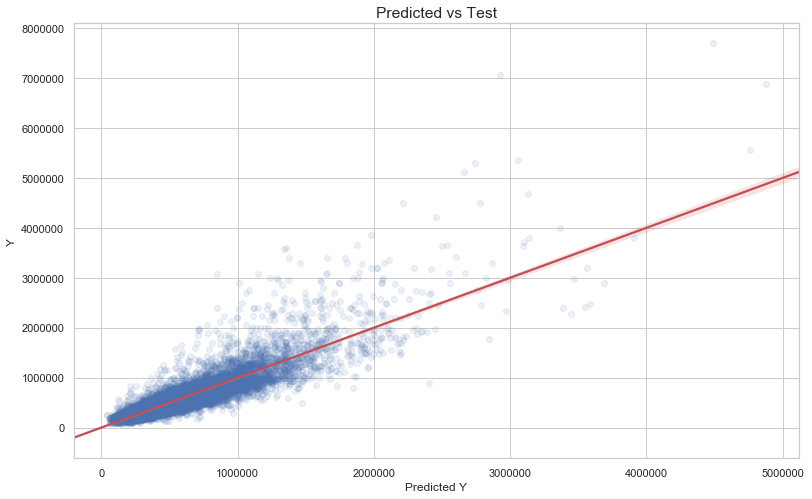

In [343]:
#plotting the predicted vs. test

test_pred = results_plt.predict(X)
residuals_test = Y - test_pred

plt.figure(figsize = (13,8))

sns.set(style = "whitegrid")

sns.regplot(test_pred, Y, scatter_kws = {'color':'b','alpha':0.1},color='r')
sns.set(font_scale = 1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y')
plt.xlabel('Predicted Y')

Text(0.5, 1.0, 'Normal Q-Q plot')

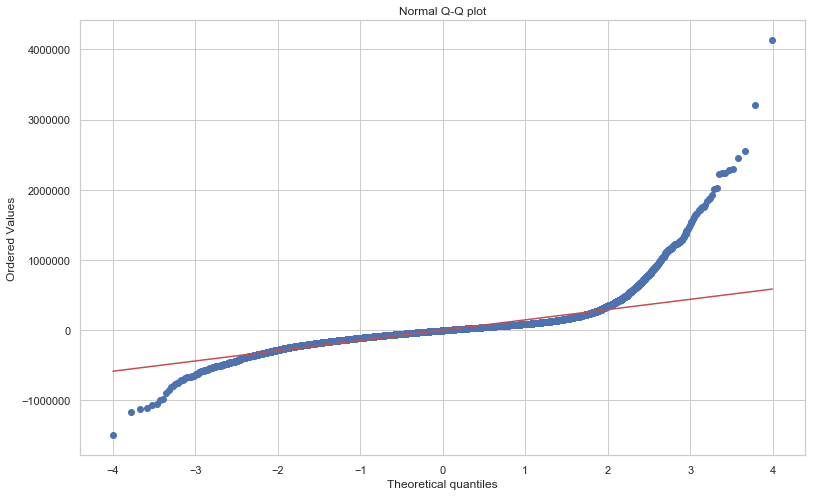

In [344]:
sns.set(style = "whitegrid")


plt.figure(figsize = (13,8))
stats.probplot(residuals_test, dist = "norm", plot = plt)
plt.title("Normal Q-Q plot")

## Test with scaled data 

In [241]:
#scaling the data
df_test = df.drop(columns = ["id", "date"])
std_scale = preprocessing.StandardScaler().fit(df_test)
df_train_test = std_scale.transform(df_test)
df_scale = pd.DataFrame(df_train_test)
df_scale.columns = df_test.columns
df_scale.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0 -0.866716 -0.411261  -1.451073    -0.980652 -0.228182 -0.915552     -0.0825   
1 -0.006252 -0.411261   0.174486     0.533369 -0.189739  0.937431     -0.0825   
2 -0.980773 -1.517363  -1.451073    -1.427234 -0.123139 -0.915552     -0.0825   
3  0.173409  0.694841   1.149821    -0.131057 -0.243878 -0.915552     -0.0825   
4 -0.082471 -0.411261  -0.150626    -0.436040 -0.169503 -0.915552     -0.0825   

       view  condition     grade  sqft_above  sqft_basement  yr_built  \
0 -0.304949  -0.629986 -0.560800   -0.735251      -0.659031 -0.544678   
1 -0.304949  -0.629986 -0.560800    0.460776       0.244602 -0.680850   
2 -0.304949  -0.629986 -1.413190   -1.230575      -0.659031 -1.293626   
3 -0.304949   2.444427 -0.560800   -0.892305       1.396734 -0.204247   
4 -0.304949  -0.629986  0.291589   -0.131197      -0.659031  0.544700   

   yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15  \
0     -0.188881  1.869645 -0.352894 -0.305695      -0.943676   -0.260627   
1      5.280462  0.879210  1.161376 -0.746286      -0.432887   -0.187700   
2     -0.188881 -0.933473  1.283355 -0.135144       1.070292   -0.172190   
3     -0.188881  1.084772 -0.283604 -1.272151      -0.914488   -0.284459   
4     -0.188881 -0.073850  0.409293  1.200840      -0.272353   -0.192686   

   season_sold  has_basement  was_renovated  combined_year_build  
0     0.123761     -0.804592      -0.188887            -0.612055  
1     0.974995      1.242866       5.294169             0.364107  
2     0.974995     -0.804592      -0.188887            -1.379040  
3     0.974995      1.242866      -0.188887            -0.263426  
4     0.974995     -0.804592      -0.188887             0.503559

In [315]:
#Trying the same lin. reg. as above with the scaled values to see if there is a difference

form = "price ~ sqft_living + C(grade) + C(zipcode)"

modell = smf.ols(data=df_scale, formula=form)
results = modell.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     968.8
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:03:24   Log-Likelihood:                -14161.
No. Observations:               21597   AIC:                         2.848e+04
Df Residuals:                   21516   BIC:                         2.913e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.1503      0.469     -0.321      0.748      -1.069       0.768
C(grade)[T.-3.1179689637126478]        -0.3507      0.477     -0.736      0.462      -1.285       0.584
C(grade)[T.-2.265579397772115]         -0.4473      0.469     -0.954      0.340      -1.367       0.472
C(grade)[T.-1.4131898318315828]        -0.5038      0.468     -1.076      0.282      -1.421       0.414
C(grade)[T.-0.5608002658910505]        -0.5251      0.468     -1.122      0.262      -1.443       0.392
C(grade)[T.0.2915893000494819]         -0.4558      0.468     -0.974      0.330      -1.373       0.462
C(grade)[T.1.1439788659900143]         -0.2257      0.468     -0.482      0.630      -1.144       0.692
C(grade)[T.1.9963684319305466]          0.1688      0.469      0.360      0.719      -0.750       1.087
C(grade)[T.2.848757997871079]           0.7992      0.469      1.704      0.088      -0.120       1.719
C(grade)[T.3.7011475638116114]          2.1075      0.472      4.470      0.000       1.183       3.032
C(grade)[T.4.553537129752144]           4.8907      0.487     10.034      0.000       3.935       5.846
C(zipcode)[T.-1.4193467179711676]       0.0414      0.041      1.003      0.316      -0.040       0.122
C(zipcode)[T.-1.4006592625852932]       0.0045      0.037      0.120      0.905      -0.068       0.077
C(zipcode)[T.-1.381971807199419]        2.0924      0.036     57.708      0.000       2.021       2.164
C(zipcode)[T.-1.3632843518135445]       0.8383      0.044     19.138      0.000       0.752       0.924
C(zipcode)[T.-1.34459689642767]         0.7292      0.033     22.320      0.000       0.665       0.793
C(zipcode)[T.-1.3259094410417958]       0.6858      0.046     14.768      0.000       0.595       0.777
C(zipcode)[T.-1.3072219856559213]       0.8418      0.037     22.686      0.000       0.769       0.915
C(zipcode)[T.-1.2698470748841726]       0.1955      0.053      3.700      0.000       0.092       0.299
C(zipcode)[T.-1.2511596194982981]       0.3523      0.042      8.480      0.000       0.271       0.434
C(zipcode)[T.-1.1950972533406752]       0.2795      0.049      5.737      0.000       0.184       0.375
C(zipcode)[T.-1.1016599764113033]       0.2399      0.042      5.727      0.000       0.158       0.322
C(zipcode)[T.-1.0455976102536801]       0.1293      0.039      3.288      0.001       0.052       0.206
C(zipcode)[T.-1.0269101548678057]      -0.0649      0.032     -2.008      0.045      -0.128      -0.002
C(zipcode)[T.-1.0082226994819314]       0.4768      0.058      8.251      0.000       0.364       0.590
C(zipcode)[T.-0.9521603333243083]       0.4411      0.034     13.038      0.000       0.375       0.507
C(zipcode)[T.-0.9334728779384339]       0.3679      0.037      9.91

#### doesnt change a thing besides giving a better condition number

also plotting the scaled to show that there is no difference

In [327]:
Y_scale = df_scale.price
df_scale_plot = df_scale.drop(columns = "price")


In [328]:
df_scale_plot["zipcode"] = df_scale_plot.zipcode.astype(str)
zipcode_dummy_scale = pd.get_dummies(df_scale_plot.zipcode, prefix = "zip", drop_first = True)
df_scale_plot = pd.concat([df_scale_plot, zipcode_dummy_scale], axis = 1)

df_scale_plot["grade"] = df_scale_plot.grade.astype(str)
grade_dummy_scale = pd.get_dummies(df_scale_plot.grade, prefix = "grade", drop_first=True)
df_scale_plot = pd.concat([df_scale_plot, grade_dummy_scale], axis = 1)


In [329]:
X_plot = df_scale_plot.drop(columns = ["bedrooms", "bathrooms", "sqft_lot",
                        "floors", "condition", "grade", "sqft_above",
                        "sqft_basement", "yr_built", "yr_renovated",
                        "zipcode", "lat", "long", "sqft_living15", 
                        "sqft_lot15", "season_sold", "has_basement",
                        "was_renovated", "combined_year_build", "waterfront",
                        "view"])

In [330]:
X_plot = sm.add_constant(X_plot)
modell = smf.OLS(Y_scale, X_plot)
results_scale = modell.fit()
results_scale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     968.8
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:08:47   Log-Likelihood:                -14161.
No. Observations:               21597   AIC:                         2.848e+04
Df Residuals:                   21516   BIC:                         2.913e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3825      0.034    -11.284      0.000      -0.449      -0.316
sqft_living                   0.4334      0.005     83.913      0.000       0.423       0.443
zip_-0.05516247480233835      0.1996      0.041      4.819      0.000       0.118       0.281
zip_-0.07384993018821273      0.1860      0.040      4.650      0.000       0.108       0.264
zip_-0.11122484095996148      0.1372      0.044      3.141      0.002       0.052       0.223
zip_-0.14859975173171022      0.2517      0.055      4.603      0.000       0.145       0.359
zip_-0.2420370286610821      -0.0439      0.043     -1.029      0.304      -0.128       0.040
zip_-0.35416176097632834     -0.0850      0.040     -2.139      0.032      -0.163      -0.007
zip_-0.3728492163622027      -0.2007      0.040     -5.019      0.000      -0.279      -0.122
zip_-0.41022412713395146     -0.0066      0.041     -0.162      0.872      -0.087       0.073
zip_-0.4289115825198258      -0.1680      0.044     -3.809      0.000      -0.254      -0.082
zip_-0.46628649329157457      0.2595      0.041      6.391      0.000       0.180       0.339
zip_-0.4849739486774489       0.3492      0.039      9.044      0.000       0.274       0.425
zip_-0.6157861363785695      -0.0077      0.046     -0.167      0.868      -0.098       0.082
zip_-0.6718485025361927      -0.2626      0.039     -6.731      0.000      -0.339      -0.186
zip_-0.7092234133079414       1.2365      0.043     28.546      0.000       1.152       1.321
zip_-0.7279108686938158       3.0922      0.074     41.644      0.000       2.947       3.238
zip_-0.7465983240796902      -0.2069      0.039     -5.358      0.000      -0.283      -0.131
zip_-0.8213481456231876       0.2871      0.039      7.356      0.000       0.211       0.364
zip_-0.840035601009062        0.7228      0.040     17.996      0.000       0.644       0.802
zip_-0.8587230563949364      -0.2734      0.054     -5.096      0.000      -0.379      -0.168
zip_-0.8774105117808108      -0.2468      0.044     -5.623      0.000      -0.333      -0.161
zip_-0.8960979671666851      -0.2861      0.044     -6.436      0.000      -0.373      -0.199
zip_-0.9147854225525595       0.2753      0.042      6.498      0.000       0.192       0.358
zip_-0.9334728779384339       0.0751      0.043      1.726      0.084      -0.010       0.160
zip_-0.9521603333243083       0.1482      0.040      3.663      0.000       0.069       0.228
zip_-1.0082226994819314       0.1839      0.062      2.966      0.003       0.062       0.305
zip_-1.0269101548678057      -0.3577      0.039     -9.064      0.000      -0.435      -0.280
zip_-1.0455976102536801      -0.1636      0.045     -3.596      0.000      -0.253      -0.074
zip_-1.1016599764113033      -0.0529      0.048     -1.111      0.266      

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Predicted Y')

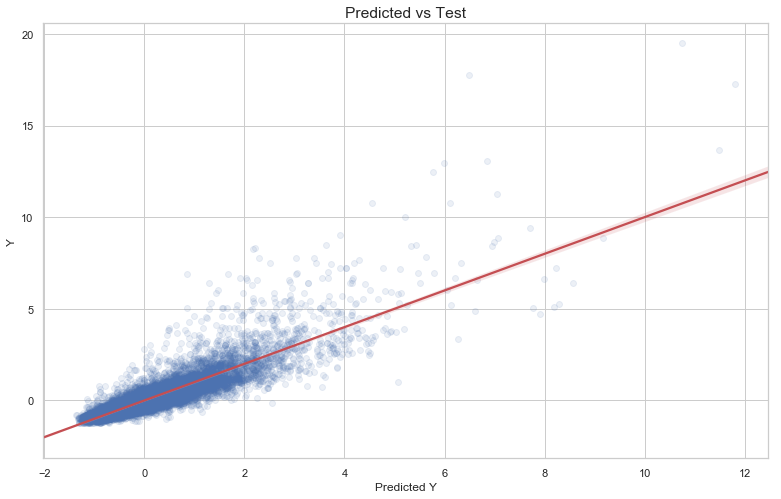

In [331]:
test_pred_scale = results_scale.predict(X_plot)
residuals_test_scale = Y_scale - test_pred_scale

plt.figure(figsize = (13,8))

sns.set(style = "whitegrid")

sns.regplot(test_pred_scale, Y_scale, scatter_kws = {'color':'b','alpha':0.1},color='r')
sns.set(font_scale = 1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y')
plt.xlabel('Predicted Y')

## Trying K fold on the data to see if we can get a better result

In [345]:
df_fold = df[["sqft_living"]]

df_fold["zipcode"] = df.zipcode.astype(str)
zipcode_dummy = pd.get_dummies(df.zipcode, prefix = "zip", drop_first = True)
df_fold = pd.concat([df_fold, zipcode_dummy], axis = 1)

df_fold["grade"] = df.grade.astype(str)
grade_dummy = pd.get_dummies(df.grade, prefix = "grade", drop_first=True)
df_fold = pd.concat([df_fold, grade_dummy], axis = 1)

Y = df.price


//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [346]:
df_fold.drop(columns=["zipcode", "grade"], inplace=True)
df_fold.head()

sqft_living  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  \
0         1180          0          0          0          0          0   
1         2570          0          0          0          0          0   
2          770          0          0          0          0          0   
3         1960          0          0          0          0          0   
4         1680          0          0          0          0          0   

   zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   zip_98022  zip_98023  zip_98024  zip_98027  zip_98028  zip_98029  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          1          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   zip_98030  zip_98031  zip_98032  zip_98033  zip_98034  zip_98038  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   zip_98039    ...     zip_98125  zip_98126  zip_98133  zip_98136  zip_98144  \
0          0    ...             0          0          0          0          0   
1          0    ...             1          0          0          0          0   
2          0    ...             0          0          0          0          0   
3          0    ...             0          0          0          1          0   
4          0    ...             0          0          0          0          0   

   zip_98146  zip_98148  zip_98155  zip_98166  zip_98168  zip_98177  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   zip_98178  zip_98188  zip_98198  zip_98199  grade_4  grade_5  grade_6  \
0          1          0          0          0        0        0        0   
1          0          0          0          0        0        0        0   
2          0          0          0          0        0        0        1   
3          0          0          0          0        0        0        0   
4          0          0          0          0        0        0        0   

   grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
0        1        0        0         0         0         0         0  
1        1        0        0         0         0         0         0  
2        0        0        0         0         0         0         0  
3        1        0        0         0         0         0         0  
4        0        1        0         0         0         0         0  

[5 rows x 80 columns]

# K fold

In [347]:
# create training and testing frames

X_train, X_test, y_train, y_test = train_test_split(df_fold, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17277, 80) (17277,)
(4320, 80) (4320,)


In [348]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [350]:
X_1 = df_fold
X_1 = sm.add_constant(X_1)
modell = smf.OLS(Y, X_1)
results = modell.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     968.8
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:15:29   Log-Likelihood:            -2.9091e+05
No. Observations:               21597   AIC:                         5.820e+05
Df Residuals:                   21516   BIC:                         5.826e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.243e+05   1.72e+05      0.722      0.470   -2.13e+05    4.62e+05
sqft_living   173.4017      2.066     83.913      0.000     169.351     177.452
zip_98002    1.522e+04   1.52e+04      1.003      0.316   -1.45e+04     4.5e+04
zip_98003    1637.7364   1.37e+04      0.120      0.905   -2.52e+04    2.84e+04
zip_98004    7.687e+05   1.33e+04     57.708      0.000    7.43e+05    7.95e+05
zip_98005     3.08e+05   1.61e+04     19.138      0.000    2.76e+05     3.4e+05
zip_98006    2.679e+05    1.2e+04     22.320      0.000    2.44e+05    2.91e+05
zip_98007    2.519e+05   1.71e+04     14.768      0.000    2.18e+05    2.85e+05
zip_98008    3.092e+05   1.36e+04     22.686      0.000    2.83e+05    3.36e+05
zip_98010    7.181e+04   1.94e+04      3.700      0.000    3.38e+04     1.1e+05
zip_98011    1.294e+05   1.53e+04      8.480      0.000    9.95e+04    1.59e+05
zip_98014    1.027e+05   1.79e+04      5.737      0.000    6.76e+04    1.38e+05
zip_98019    8.813e+04   1.54e+04      5.727      0.000     5.8e+04    1.18e+05
zip_98022    4.749e+04   1.44e+04      3.288      0.001    1.92e+04    7.58e+04
zip_98023   -2.383e+04   1.19e+04     -2.008      0.045   -4.71e+04    -568.344
zip_98024    1.751e+05   2.12e+04      8.251      0.000    1.34e+05    2.17e+05
zip_98027     1.62e+05   1.24e+04     13.038      0.000    1.38e+05    1.86e+05
zip_98028    1.352e+05   1.36e+04      9.916      0.000    1.08e+05    1.62e+05
zip_98029    2.087e+05   1.33e+04     15.740      0.000    1.83e+05    2.35e+05
zip_98030    2475.5118    1.4e+04      0.177      0.860    -2.5e+04       3e+04
zip_98031    1.691e+04   1.38e+04      1.228      0.219   -1.01e+04    4.39e+04
zip_98032    7148.6713   1.78e+04      0.401      0.688   -2.78e+04    4.21e+04
zip_98033    3.731e+05   1.23e+04     30.396      0.000    3.49e+05    3.97e+05
zip_98034    2.131e+05   1.17e+04     18.287      0.000     1.9e+05    2.36e+05
zip_98038    3.159e+04   1.15e+04      2.752      0.006    9093.701    5.41e+04
zip_98039    1.244e+06   2.61e+04     47.575      0.000    1.19e+06    1.29e+06
zip_98040    5.618e+05   1.38e+04     40.719      0.000    5.35e+05    5.89e+05
zip_98042    1.112e+04   1.16e+04      0.956      0.339   -1.17e+04    3.39e+04
zip_98045    1.048e+05   1.47e+04      7.136      0.000     7.6e+04    1.34e+05
zip_98052    2.359e+05   1.16e+04     20.360      0.000    2.13e+05    2.59e+05
zip_98053    2.029e+05   1.25e+04     16.238      0.000    1.78e+05    2.27e+05
zip_98055    4.587e+04   1.38e+04      3.314      0.001    1.87e+04     7.3e+04
zip_98056    1.052e+05   1.24e+04      8.457      0.000    8.08e+04     1.3e+05
zip_98058    3.384e+04   1.21e+04      2.795      0.005    1.01e+04    5.76e+04
zip_98059    7.637e+04   1.21e+04      6.336      0.000    5.27e+04       1e+05
zip_98065    9.144e+04   1.34e+04      6.84

In [351]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df_fold, Y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [-2.24252636e+13  7.63545270e-01  7.78712112e-01  7.83236655e-01
  7.93226801e-01  7.97068611e-01]


## Things that could still be worked at

- Finding more data sets to get better results.
- Getting rid of outliers and look at the results after it

## Concluding remark

At the start of the notebook we asked the following questions:
- How is the price of a house influenced by other features ?
- Which of these features would, in a real situation, be able to be changed to increase the house price ?
- Is there a season where the price of the houses goes up ?
- Does the location of the house have an impact on its price ?

What can we now say to these?

To a surprise the price of a house is only highly dependent on three features: Space of the house, grade and the location. Of these features we can only change grade. So we took a closer look at it.<br>
Grade incorporated many of the other features, like age of the house, floors, bath- and bedrooms, etc. Of these, in the case of a renovation, it would in general be the easiest to add a bath or bedroom (or change one of the exisiting rooms to one). From what we learned from the King County Gov. website renovating the general condition of the house would improve the grade greatly too.<br>
Seasons on the other hand had no significant impact on the price of a house.<br>
As already mentioned above the location of a house had a impact though. Depending on where your house is situated it is worth much more than in other parts of the county.

With reference to the features, the data of a couple of them seemed flawed.<br>
The waterfront data seemed to have way too many zeroes considering we are looking at King County and a huge waterline.<br>
Similarly the number of renovations seem very low too. It might be that only major renovations were taken into consideration, but we cannot know that for sure.<br>
Lastly the feature view was on one hand only sparsely present and on the other hand it is still not clear what exactly it means.<br>
Hence these features were largely not useful.